# GELAR RASA 2024
- Aufii Fathin Nabila (Universitas Brawijaya)
- Dwi Cahya Maulani (Universitas Brawijaya)
- Fira Zaha Iklila (Universitas Brawijaya)

*Gelar Rasa 2024 - Analisis Airbnb New York City*

Notebook ini bertujuan untuk menganalisis data listing Airbnb di New York City dan menyajikan informasi yang relevan untuk pembuatan dashboard interaktif. Analisis ini meliputi beberapa tahapan utama, yaitu:

1. **Data Cleansing** - Membersihkan dan menyiapkan data untuk analisis, termasuk penanganan nilai yang hilang, standarisasi format, dan normalisasi fitur numerik agar data siap digunakan dalam pemodelan dan visualisasi.

2. **Download CSV** - Menyediakan hasil data dalam bentuk CSV yang telah diproses untuk dapat diunduh dan digunakan lebih lanjut dalam pengembangan dashboard atau analisis lainnya.

3. **Descriptive Model** - Menggambarkan pola umum dalam data, seperti distribusi harga, rating rata-rata, dan faktor-faktor yang berpotensi mempengaruhi harga listing. Model ini menghasilkan visualisasi dan insight yang akan digunakan dalam dashboard untuk memahami preferensi pengguna dan dinamika harga di New York City.

4. **Predictive Model** - Membangun model prediktif untuk mengestimasi harga optimal berdasarkan berbagai fitur listing, seperti tipe properti, tipe kamar, lokasi, kapasitas, dan fasilitas yang tersedia. Prediksi ini dapat digunakan oleh pemilik properti untuk menentukan harga yang kompetitif di pasaran.

Hasil dari notebook ini akan diintegrasikan ke dalam dashboard interaktif yang berjudul **“Pricing, Ratings, and Demand for New York’s AirBnB Listings”**, yang membantu pengguna dalam memahami berbagai aspek harga, rating, dan preferensi tipe akomodasi berdasarkan data historis. Dashboard ini diharapkan dapat memberikan wawasan yang berharga bagi pemilik properti maupun perusahaan dalam menentukan strategi harga dan meningkatkan daya tarik listing mereka.


## Data Cleansing

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from scipy.stats import uniform, randint

In [3]:
dfh = pd.read_csv('study case/hosts.csv')
dfl = pd.read_csv('study case/listings.csv')
dfr = pd.read_csv('study case/reviews.csv')

- dfl untuk data 'listings.csv'
- dfr untuk data 'ratings.csv'
- dfh untuk data 'hosts.csv'

In [4]:
dfh.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified
0,2571,2008-08-27,"Brooklyn, New York, United States",within a few hours,0.93,0.67,t,1.0,t,t
1,2782,2008-09-07,"New York, New York, United States",within a day,1.00,0.57,t,2.0,t,t
2,2787,2008-09-07,"New York, New York, United States",within an hour,1.00,0.97,t,8.0,t,f
3,2868,2008-09-10,"New York, New York, United States",within a day,1.00,0.00,f,1.0,t,f
4,2881,2008-09-10,"Brooklyn, New York",within an hour,1.00,0.95,t,5.0,t,t


In [5]:
dfl.head()

,listing_id,listings_name,host_id,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,Clinton Hill,Brooklyn,New York,40.68514,-73.95976,Entire guest suite,Entire place,3,1.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",73,1,730,f
1,5178,Large Furnished Room Near B'wayÃ£â¬â¬,8967,Midtown,Manhattan,New York,40.76468,-73.98315,Private room in apartment,Private room,2,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",79,2,14,f
2,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,South Slope,Brooklyn,New York,40.66829,-73.98779,Private room in townhouse,Private room,2,1.0,"[""Shampoo"", ""Air conditioning"", ""Free street p...",83,4,90,f
3,6990,UES Beautiful Blue Room,16800,East Harlem,Manhattan,New York,40.78962,-73.94802,Private room in apartment,Private room,1,1.0,"[""Hair dryer"", ""Stove"", ""Breakfast"", ""Smoke al...",62,30,700,t
4,7097,Perfect for Your Parents: Privacy + Garden,17571,Fort Greene,Brooklyn,New York,40.69121,-73.97277,Entire apartment,Entire place,4,1.0,"[""Single level home"", ""Refrigerator"", ""Microwa...",199,2,1125,t


In [6]:
dfr.head()

,review_id,listing_id,reviewer_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_date
0,1743,5803,9868,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-04-23
1,2091,5178,8443,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-06
2,2767,5803,16345,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-05-17
3,3015,5178,15642,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-23
4,3549,5803,19091,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-06-03


### missing value

In [7]:
dfl.isnull().mean() * 100

listing_id          0.0
listings_name       0.0
host_id             0.0
neighbourhood       0.0
district            0.0
city                0.0
latitude            0.0
longitude           0.0
property_type       0.0
room_type           0.0
accommodates        0.0
bedrooms            0.0
amenities           0.0
price               0.0
minimum_nights      0.0
maximum_nights      0.0
instant_bookable    0.0
dtype: float64

In [8]:
dfl.isnull().mean() * 100

listing_id          0.0
listings_name       0.0
host_id             0.0
neighbourhood       0.0
district            0.0
city                0.0
latitude            0.0
longitude           0.0
property_type       0.0
room_type           0.0
accommodates        0.0
bedrooms            0.0
amenities           0.0
price               0.0
minimum_nights      0.0
maximum_nights      0.0
instant_bookable    0.0
dtype: float64

In [9]:
dfr.isnull().mean() * 100

review_id                      0.0
listing_id                     0.0
reviewer_id                    0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
review_date                    0.0
dtype: float64

anjay gaada missing value

### data format and data types

In [10]:
dfh.dtypes

host_id                        int64
host_since                    object
host_location                 object
host_response_time            object
host_response_rate           float64
host_acceptance_rate         float64
host_is_superhost             object
host_total_listings_count    float64
host_has_profile_pic          object
host_identity_verified        object
dtype: object

host_since ubah ke datetime. host_is_superhost, host_has_profile_pic, host_identity_verified ubah jadi boolean

In [11]:
dfh['host_is_superhost'] = dfh['host_is_superhost'].map({'t': True, 'f': False})
dfh['host_is_superhost'] = dfh['host_is_superhost'].astype(bool)

dfh['host_has_profile_pic'] = dfh['host_has_profile_pic'].map({'t': True, 'f': False})
dfh['host_has_profile_pic'] = dfh['host_has_profile_pic'].astype(bool)

dfh['host_identity_verified'] = dfh['host_identity_verified'].map({'t': True, 'f': False})
dfh['host_identity_verified'] = dfh['host_identity_verified'].astype(bool)

In [12]:
dfh.dtypes

host_id                        int64
host_since                    object
host_location                 object
host_response_time            object
host_response_rate           float64
host_acceptance_rate         float64
host_is_superhost               bool
host_total_listings_count    float64
host_has_profile_pic            bool
host_identity_verified          bool
dtype: object

In [13]:
dfl.dtypes

listing_id            int64
listings_name        object
host_id               int64
neighbourhood        object
district             object
city                 object
latitude            float64
longitude           float64
property_type        object
room_type            object
accommodates          int64
bedrooms            float64
amenities            object
price                 int64
minimum_nights        int64
maximum_nights        int64
instant_bookable     object
dtype: object

karena instant_bookable isinya trur false, jadi ubah aja ke boolean

In [14]:
dfl['instant_bookable'] = dfl['instant_bookable'].map({'t': True, 'f': False})
dfl['instant_bookable'] = dfl['instant_bookable'].astype(bool)

cek lagi

In [15]:
dfl.dtypes

listing_id            int64
listings_name        object
host_id               int64
neighbourhood        object
district             object
city                 object
latitude            float64
longitude           float64
property_type        object
room_type            object
accommodates          int64
bedrooms            float64
amenities            object
price                 int64
minimum_nights        int64
maximum_nights        int64
instant_bookable       bool
dtype: object

In [16]:
dfl.dtypes

listing_id            int64
listings_name        object
host_id               int64
neighbourhood        object
district             object
city                 object
latitude            float64
longitude           float64
property_type        object
room_type            object
accommodates          int64
bedrooms            float64
amenities            object
price                 int64
minimum_nights        int64
maximum_nights        int64
instant_bookable       bool
dtype: object

ok sip udah sesuai

In [17]:
dfr.dtypes

review_id                        int64
listing_id                       int64
reviewer_id                      int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
review_date                     object
dtype: object

yang date ubah jadi datetime aja

In [18]:
dfr.dtypes

review_id                        int64
listing_id                       int64
reviewer_id                      int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
review_date                     object
dtype: object

### standardization

seluruh data sudah mencapai standar yang baik untuk satuan dan yang lainnya

### normalization

data yang ada sudah pada ambang normal dan rapi

### binning

setelah diskusi lebih lanjut, kami memutuskan untuk data ini tidak perlu dilakukan binning, karena kami ingin membuatnya tetap terpisah dan tidak berkelompok

### outlier

untuk outlier disini akan kami cek untuk ketiga dataframe yang sudah diinisiasi di awal tadi

dfl

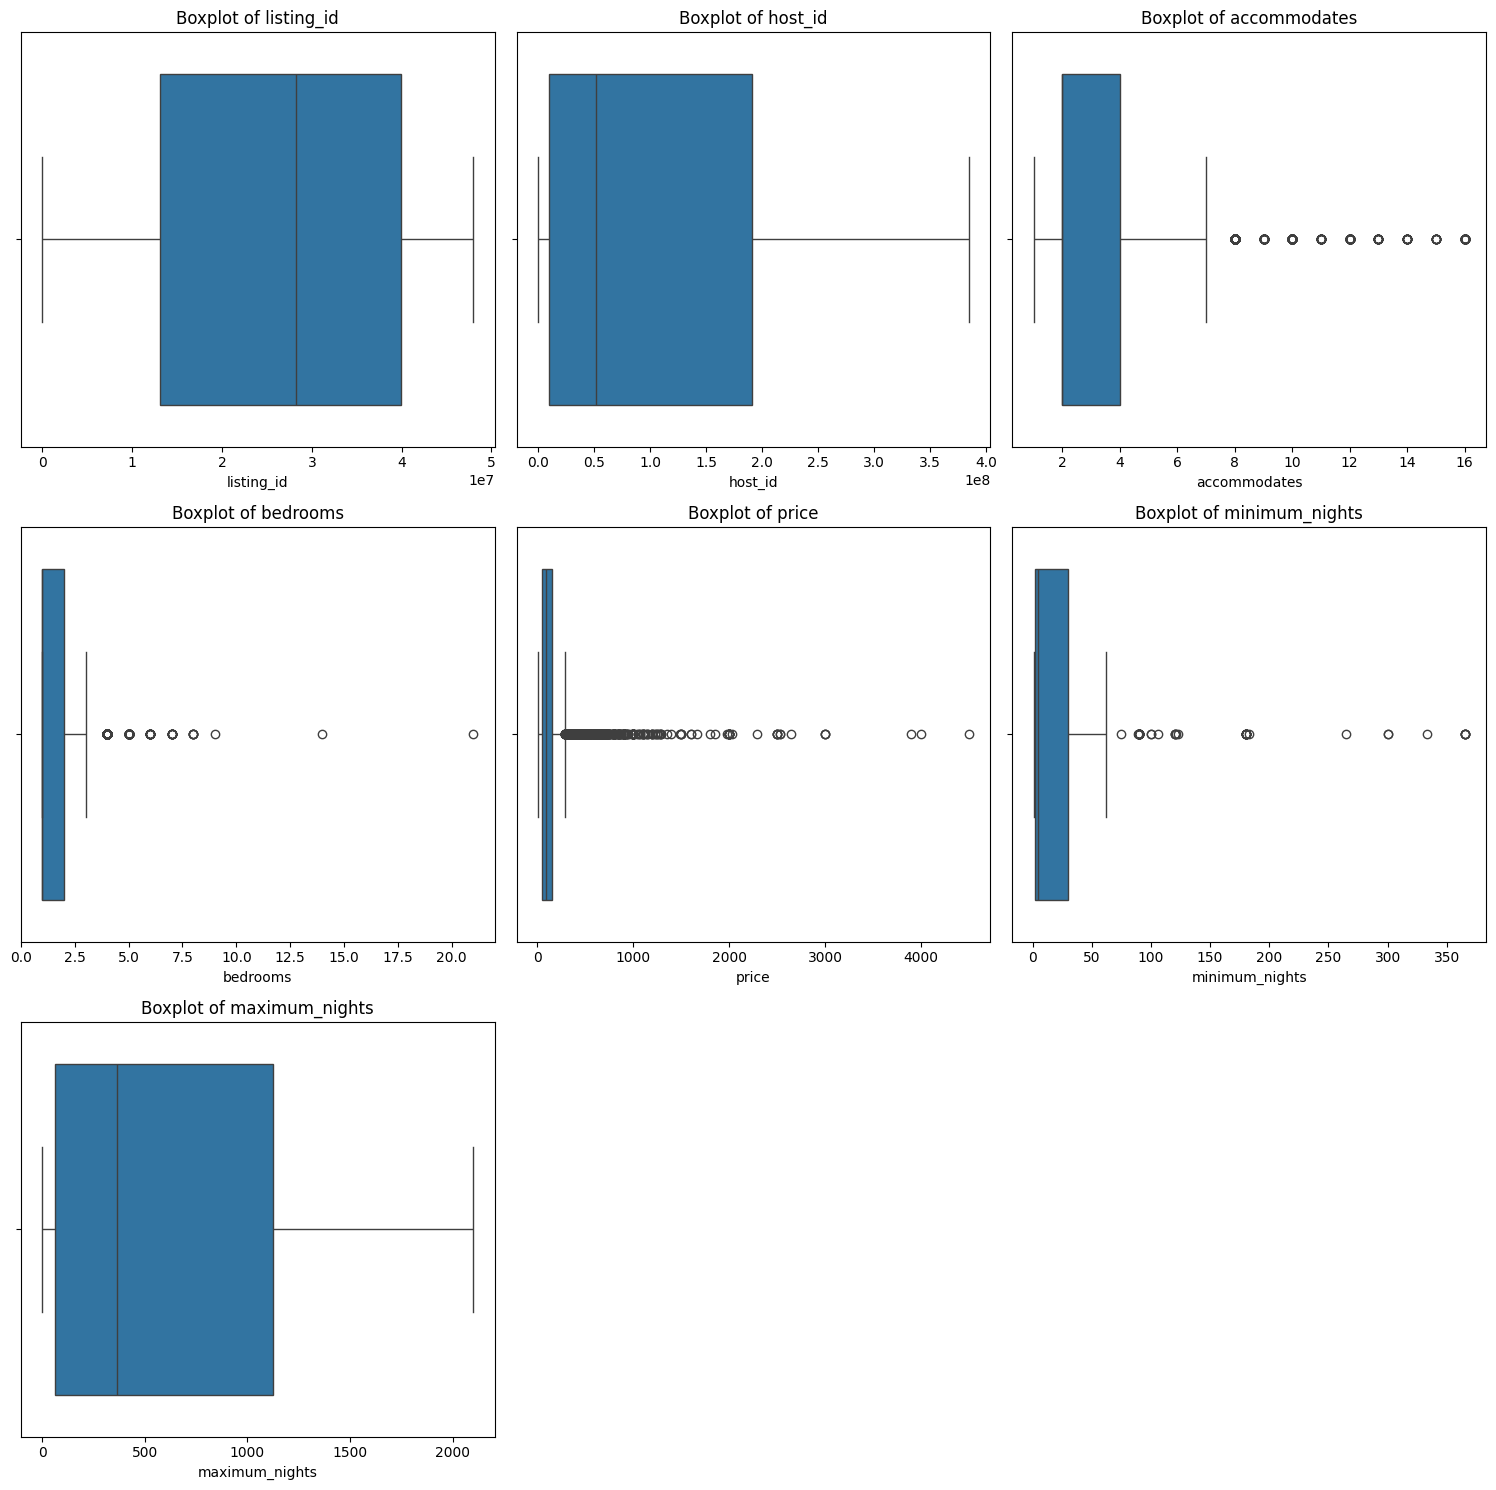

In [19]:
columns_to_plot = ['listing_id', 'host_id', 'accommodates', 'bedrooms', 
                   'price', 'minimum_nights', 'maximum_nights']

# Plotting boxplots for each selected column to detect outliers
plt.figure(figsize=(15, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=dfl[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [20]:
dfl.head()

,listing_id,listings_name,host_id,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,Clinton Hill,Brooklyn,New York,40.68514,-73.95976,Entire guest suite,Entire place,3,1.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",73,1,730,False
1,5178,Large Furnished Room Near B'wayÃ£â¬â¬,8967,Midtown,Manhattan,New York,40.76468,-73.98315,Private room in apartment,Private room,2,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",79,2,14,False
2,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,South Slope,Brooklyn,New York,40.66829,-73.98779,Private room in townhouse,Private room,2,1.0,"[""Shampoo"", ""Air conditioning"", ""Free street p...",83,4,90,False
3,6990,UES Beautiful Blue Room,16800,East Harlem,Manhattan,New York,40.78962,-73.94802,Private room in apartment,Private room,1,1.0,"[""Hair dryer"", ""Stove"", ""Breakfast"", ""Smoke al...",62,30,700,True
4,7097,Perfect for Your Parents: Privacy + Garden,17571,Fort Greene,Brooklyn,New York,40.69121,-73.97277,Entire apartment,Entire place,4,1.0,"[""Single level home"", ""Refrigerator"", ""Microwa...",199,2,1125,True


In [21]:
dfl[dfl['minimum_nights'] > 200]

,listing_id,listings_name,host_id,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable
532,794425,"Top Floor, on Park, 2 bedroom, Quiet Neighborhood",4185135,Windsor Terrace,Brooklyn,New York,40.65954,-73.97805,Entire apartment,Entire place,4,2.0,"[""Shampoo"", ""Pack ’n Play/travel crib"", ""Air c...",199,265,1124,False
533,794427,Prospect Park Modern 3 Bedroom,4185135,Windsor Terrace,Brooklyn,New York,40.65875,-73.97660,Entire apartment,Entire place,4,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Pack...",225,300,1119,False
2466,9836940,Bright & Sunny 2-Bed - Bushwick/Bed-Stuy Border!,10664416,Bedford-Stuyvesant,Brooklyn,New York,40.68735,-73.91960,Entire apartment,Entire place,6,2.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",175,300,365,False
2919,12916189,Family Friendly BK Townhome With Garden Oasis!,951917,Sunset Park,Brooklyn,New York,40.66317,-73.99748,Entire house,Entire place,6,2.0,"[""Refrigerator"", ""Shampoo"", ""Pack ’n Play/trav...",237,365,1125,False
5792,27524258,Darling Duplex on UES,17826780,Upper East Side,Manhattan,New York,40.77460,-73.95595,Entire loft,Entire place,2,1.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",150,365,730,False
7163,33807644,Williamsburg 30 days min. 2bath/en suite 2bedroom,10951481,Williamsburg,Brooklyn,New York,40.71259,-73.96679,Entire apartment,Entire place,4,2.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Smar...",190,365,365,True
10096,43411687,Dreamy 2br Red Hook Escape w/ Roof Deck and a ...,2588147,Red Hook,Brooklyn,New York,40.67572,-74.01283,Entire condominium,Entire place,4,2.0,"[""Smart lock"", ""Shampoo"", ""High chair"", ""Pack ...",150,365,1125,False
10316,44029154,"Doorman 24/7, Bedroom only steps to Times Square.",322460407,Theater District,Manhattan,New York,40.75955,-73.98735,Private room in apartment,Private room,1,1.0,"[""Refrigerator"", ""Single level home"", ""Microwa...",69,333,1125,True
11495,46676759,Nice and safe ROOM near LGA/Manhattan,231633841,Jackson Heights,Queens,New York,40.74899,-73.87670,Private room in apartment,Private room,2,1.0,"[""Babysitter recommendations"", ""Keurig coffee ...",55,365,365,False


dfh

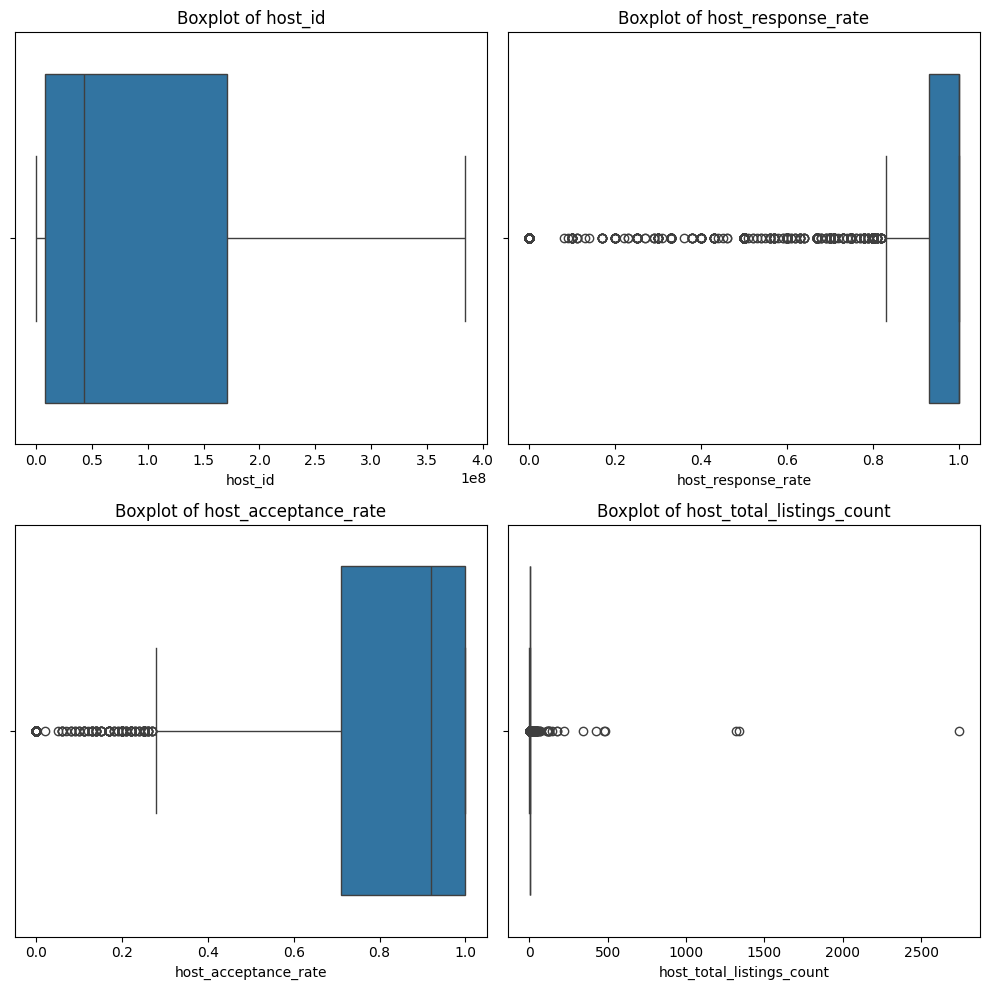

In [22]:
columns_to_plot_dfh = ['host_id', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count']

# Plotting boxplots for each selected column in dfh to detect outliers
plt.figure(figsize=(10, 10))

for i, column in enumerate(columns_to_plot_dfh, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=dfh[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

dfr

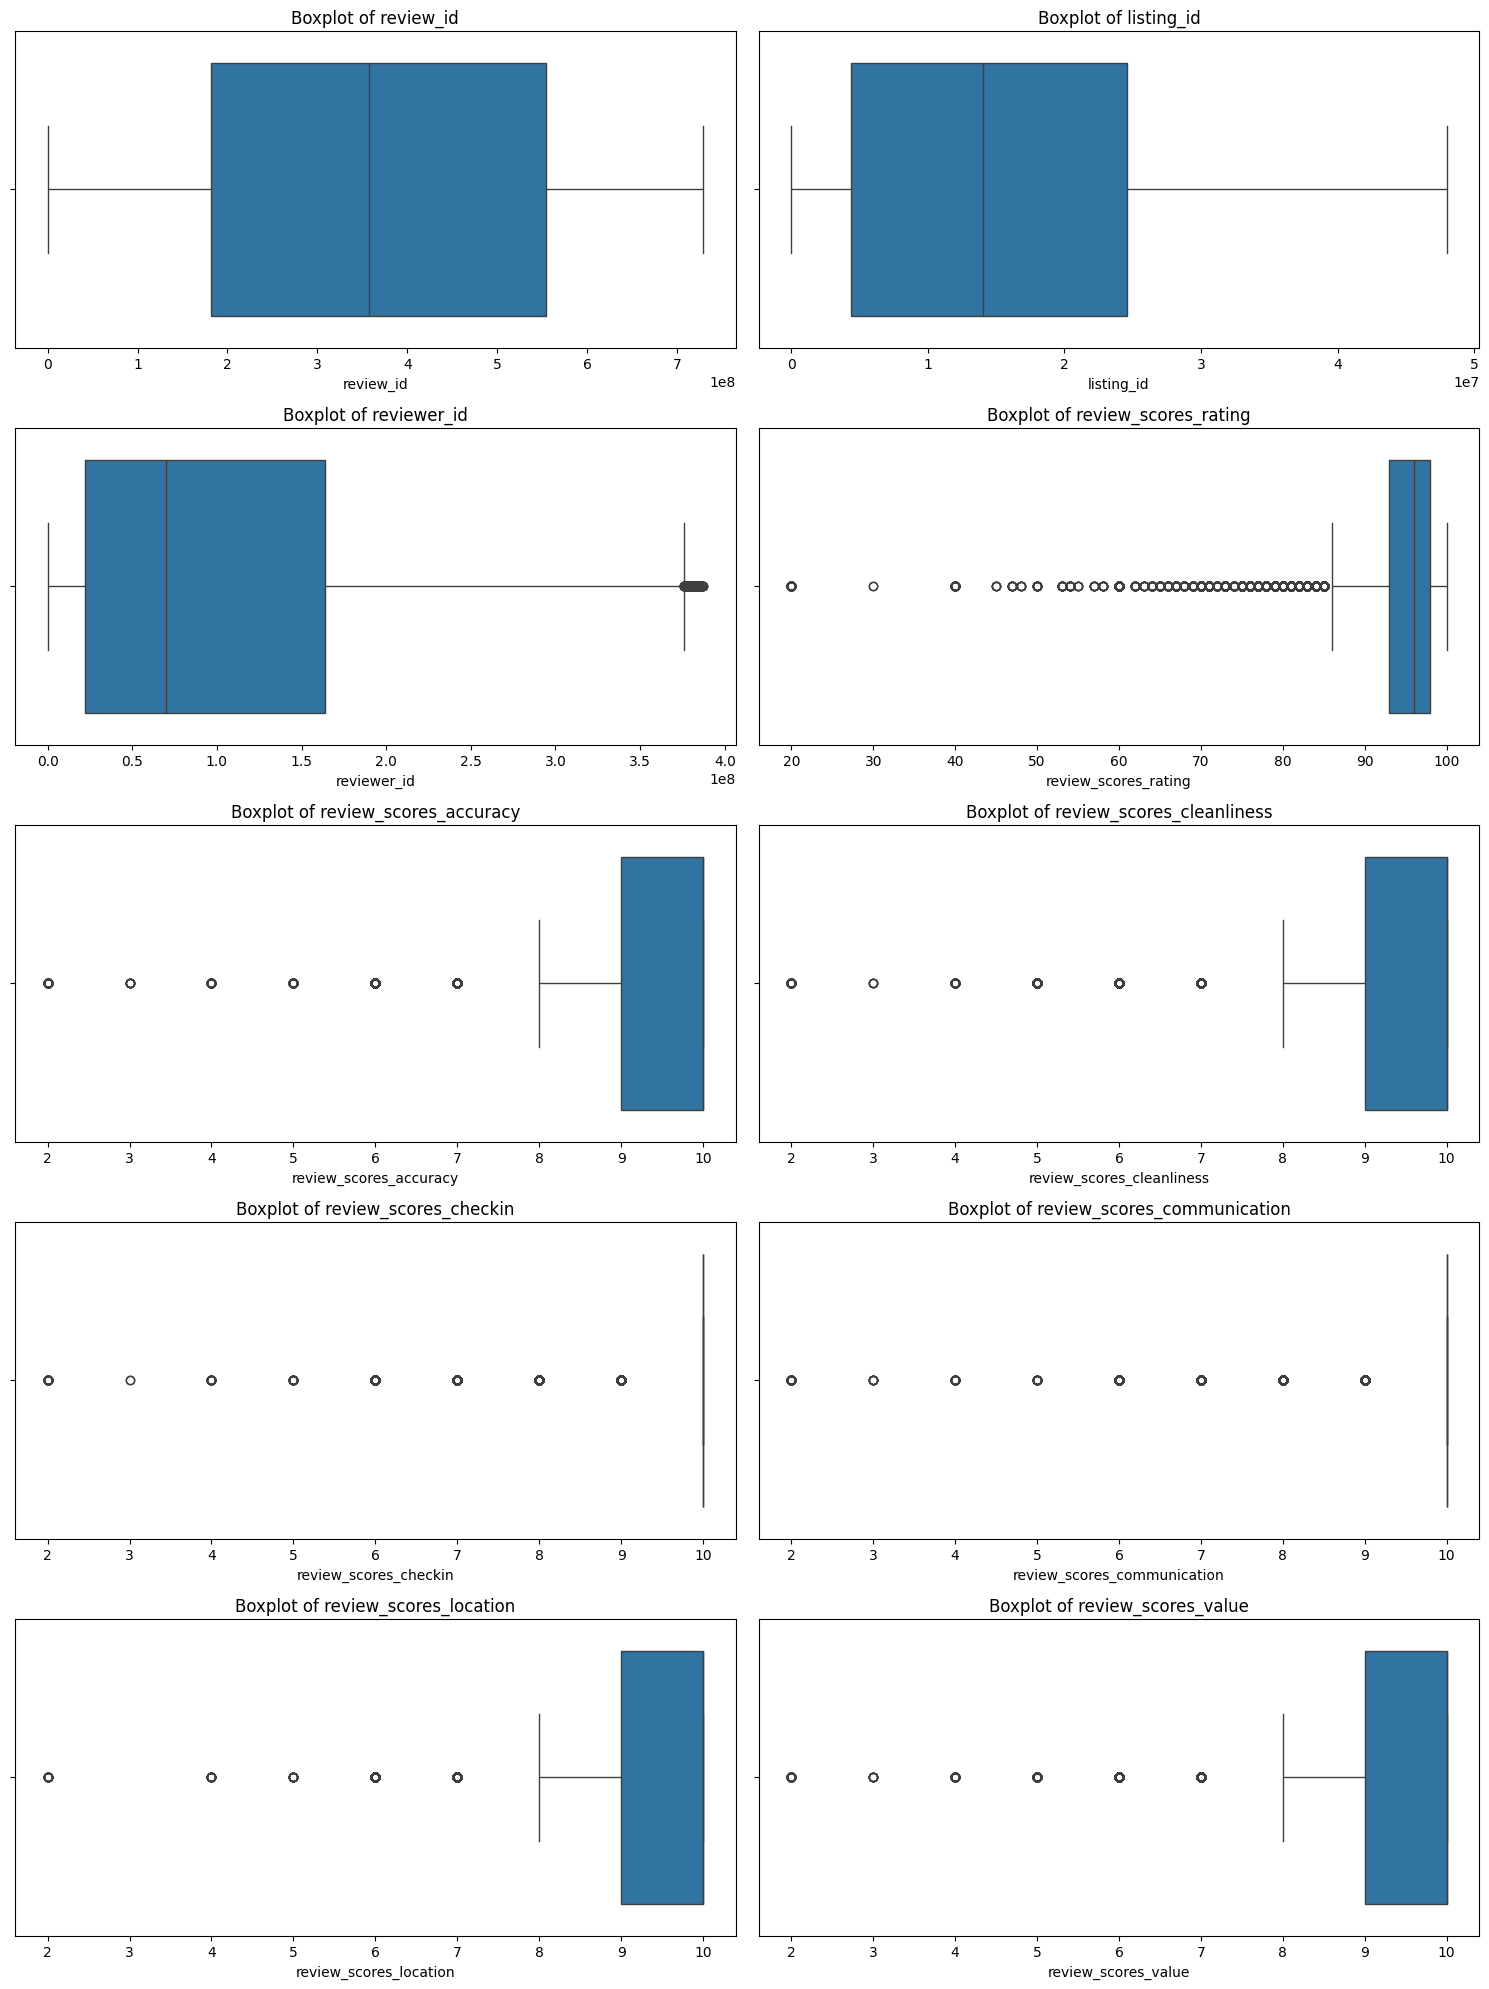

In [23]:
columns_to_plot_dfr = [
    'review_id', 'listing_id', 'reviewer_id', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value'
]

# Plotting boxplots for each selected column in dfr to detect outliers
plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_to_plot_dfr, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=dfr[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

setelah analisis lebih lanjut dan pemahaman data, data-data diatas dinyatak tidak ada outlier

## Download CSV

In [24]:
dfr.head(22)

,review_id,listing_id,reviewer_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_date
0,1743,5803,9868,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-04-23
1,2091,5178,8443,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-06
2,2767,5803,16345,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-05-17
3,3015,5178,15642,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-23
4,3549,5803,19091,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-06-03
5,4019,5178,19644,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-06-14
6,5138,5178,18347,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-07-06
7,5554,5803,24880,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-07-14
8,5840,5803,17112,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-07-20
9,8211,5178,32936,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-08-24


In [25]:
df_partial = dfl

def check_non_utf8_columns(df):
    non_utf8_columns = {}
    for col in df.columns:
        try:
            df[col].astype(str).apply(lambda x: x.encode('utf-8')).tolist()
        except UnicodeEncodeError:
            non_utf8_columns[col] = "Contains non-UTF-8 characters"
    return non_utf8_columns

non_utf8_columns = check_non_utf8_columns(df_partial)
print(non_utf8_columns)

{}


## Descriptive Model

disini kami melakukan merge atau join left agar data lebih blend ketika akan dibuat visualisasinya

In [26]:
df = pd.merge(dfl, dfr, on='listing_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514467 entries, 0 to 514466
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   514467 non-null  int64  
 1   listings_name                514467 non-null  object 
 2   host_id                      514467 non-null  int64  
 3   neighbourhood                514467 non-null  object 
 4   district                     514467 non-null  object 
 5   city                         514467 non-null  object 
 6   latitude                     514467 non-null  float64
 7   longitude                    514467 non-null  float64
 8   property_type                514467 non-null  object 
 9   room_type                    514467 non-null  object 
 10  accommodates                 514467 non-null  int64  
 11  bedrooms                     514467 non-null  float64
 12  amenities                    514467 non-null  object 
 13 

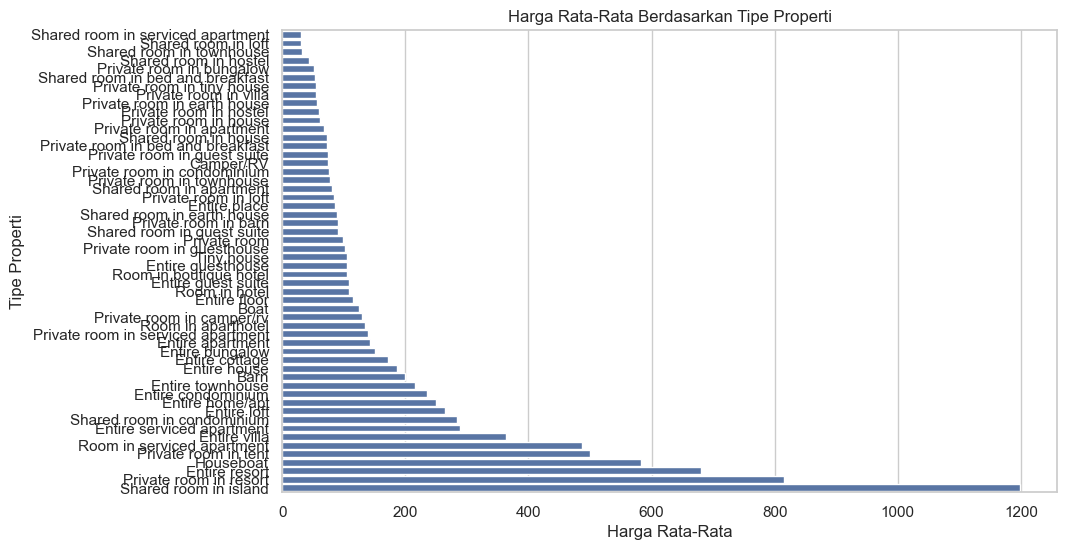

In [27]:
# 1. Bagaimana perbandingan harga rata-rata per malam untuk tiap tipe properti?
#Join the dataframes on `listing_id` to combine listings and reviews data
df = pd.merge(dfl, dfr, on='listing_id', how='left')

# Set plot style
sns.set(style="whitegrid")

# 1. Harga Rata-Rata Berdasarkan Tipe Properti
plt.figure(figsize=(10, 6))
avg_price_by_property_type = df.groupby('property_type')['price'].mean().sort_values()
sns.barplot(x=avg_price_by_property_type, y=avg_price_by_property_type.index)
plt.title('Harga Rata-Rata Berdasarkan Tipe Properti')
plt.xlabel('Harga Rata-Rata')
plt.ylabel('Tipe Properti')
plt.show()

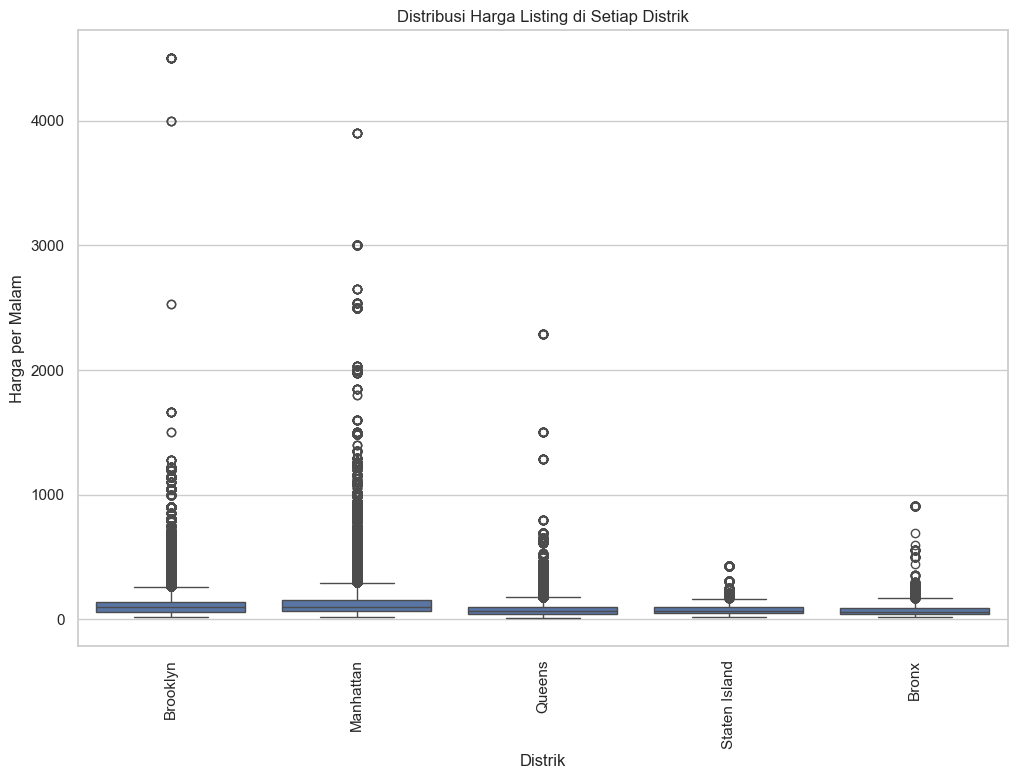

In [28]:
# 2. Bagaimana distribusi harga listing di setiap distrik? Apakah ada distrik yang mendominasi harga tinggi atau rendah?
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='district', y='price')
plt.xticks(rotation=90)
plt.title('Distribusi Harga Listing di Setiap Distrik')
plt.xlabel('Distrik')
plt.ylabel('Harga per Malam')
plt.show()

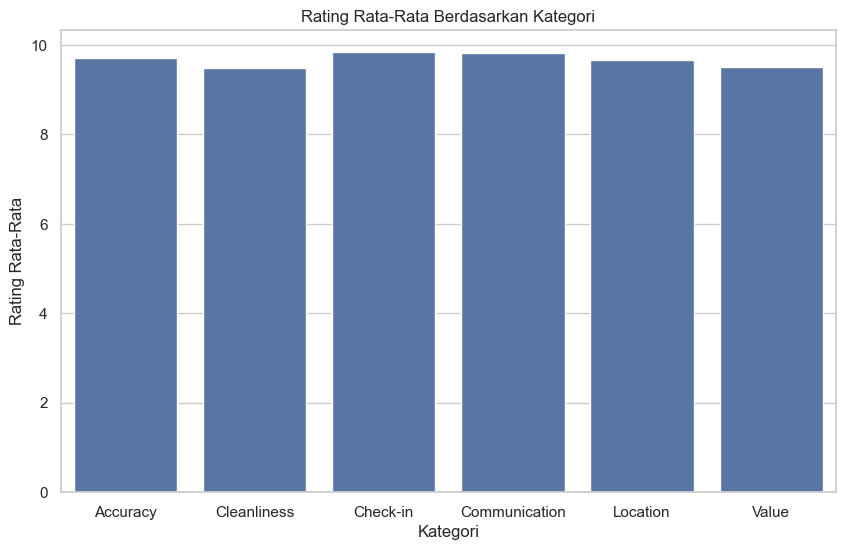

In [29]:
# 3. Rating Rata-Rata Berdasarkan Kategori
rating_columns = [
    'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value'
]
avg_ratings = df[rating_columns].mean()

# Daftar singkatan untuk nama kolom
rating_labels = ['Accuracy', 'Cleanliness', 'Check-in', 'Communication', 'Location', 'Value']

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_labels, y=avg_ratings.values)  # Menggunakan label singkatan
plt.title('Rating Rata-Rata Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rating Rata-Rata')
plt.show()

C:\Users\Aufii\AppData\Local\Temp\ipykernel_25444\3292974899.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_listings, x='review_scores_rating', y='listings_name', palette='viridis')


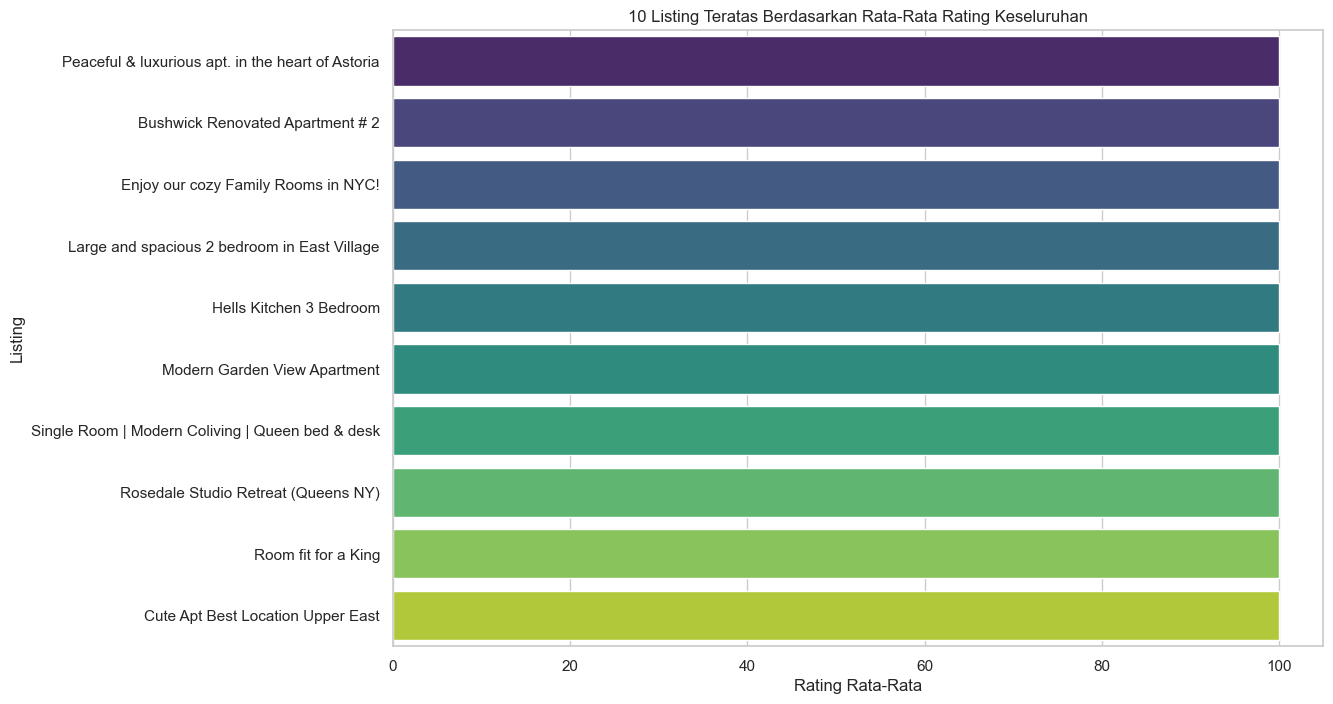

In [30]:
# 4. 
# Menghitung rata-rata rating untuk setiap listing berdasarkan listing_id
top_listings = df.groupby('listing_id', as_index=False)['review_scores_rating'].mean()

# Menggabungkan dengan informasi listing lainnya untuk mendapatkan nama dan karakteristik lainnya
top_listings = pd.merge(top_listings, dfl[['listing_id', 'listings_name', 'price', 'district', 'room_type']], on='listing_id', how='left')

# Mengambil 10 listing dengan rating rata-rata tertinggi
top_listings = top_listings.sort_values(by='review_scores_rating', ascending=False).head(10)

# Membuat plot dengan nama listing sebagai kategori
plt.figure(figsize=(12, 8))
sns.barplot(data=top_listings, x='review_scores_rating', y='listings_name', palette='viridis')
plt.title('10 Listing Teratas Berdasarkan Rata-Rata Rating Keseluruhan')
plt.xlabel('Rating Rata-Rata')
plt.ylabel('Listing')
plt.show()


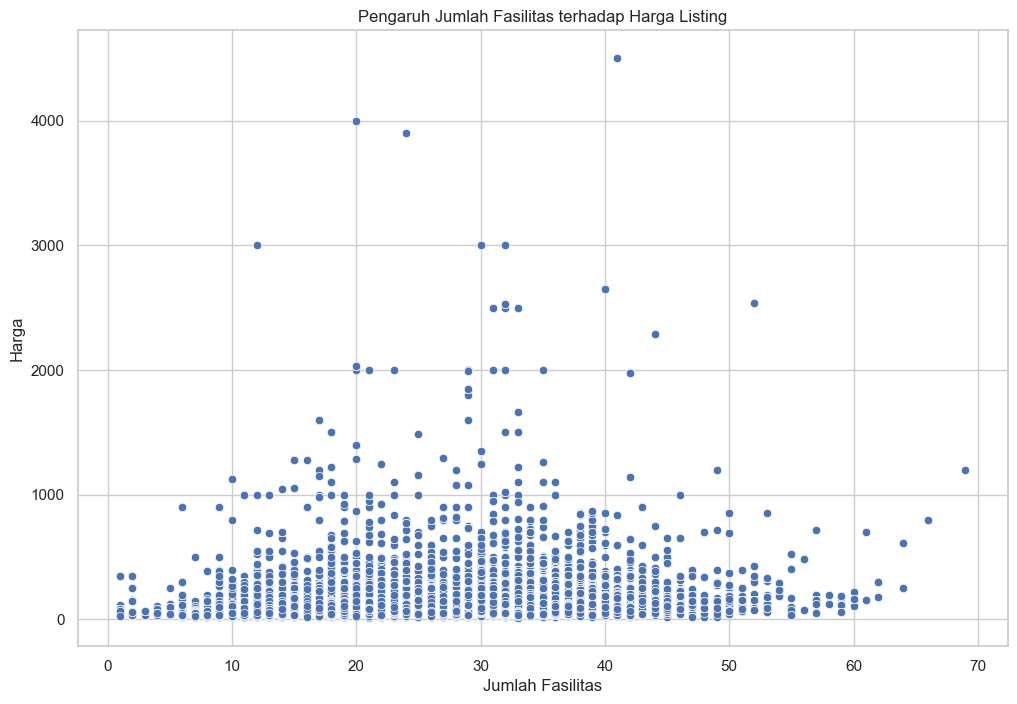

In [31]:
#5. Pengaruh Fasilitas terhadap Harga
# Menghitung jumlah fasilitas dengan menghitung jumlah koma dalam string amenities
df['amenities_count'] = df['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)

# Membuat scatter plot untuk melihat pengaruh jumlah fasilitas terhadap harga
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='amenities_count', y='price')
plt.title('Pengaruh Jumlah Fasilitas terhadap Harga Listing')
plt.xlabel('Jumlah Fasilitas')
plt.ylabel('Harga')
plt.show()

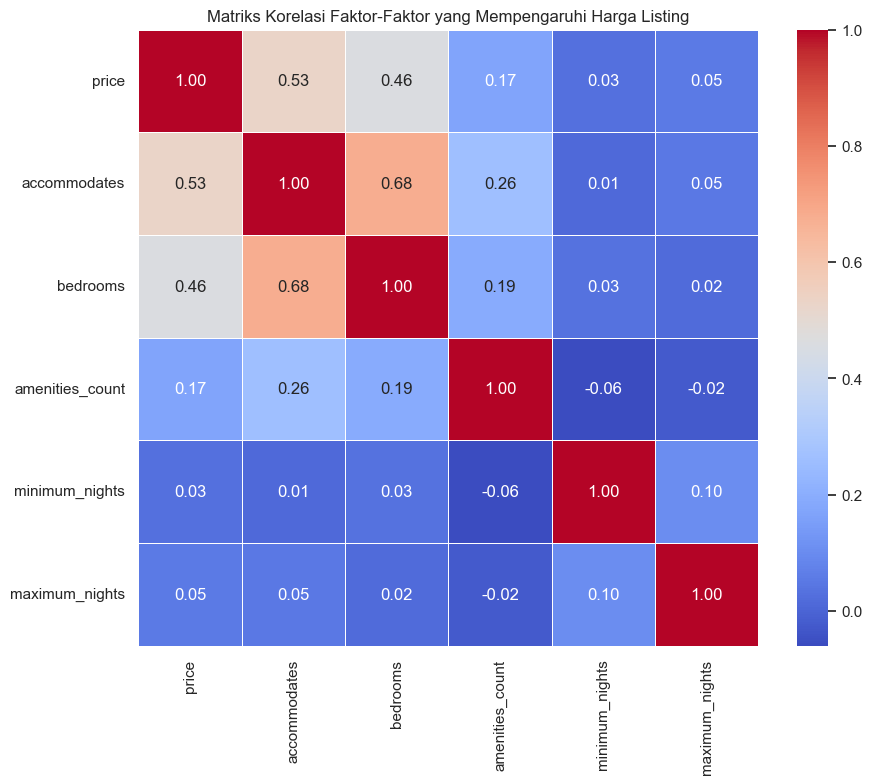

In [32]:
#6. Apa faktor-faktor utama yang memengaruhi harga listing?
# Memilih kolom yang relevan untuk analisis korelasi
# Pastikan kolom yang dipilih sesuai dengan data Anda
relevant_columns = ['price', 'accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']
correlation_data = df[relevant_columns]

# Menghitung matriks korelasi
correlation_matrix = correlation_data.corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Faktor-Faktor yang Mempengaruhi Harga Listing')
plt.show()

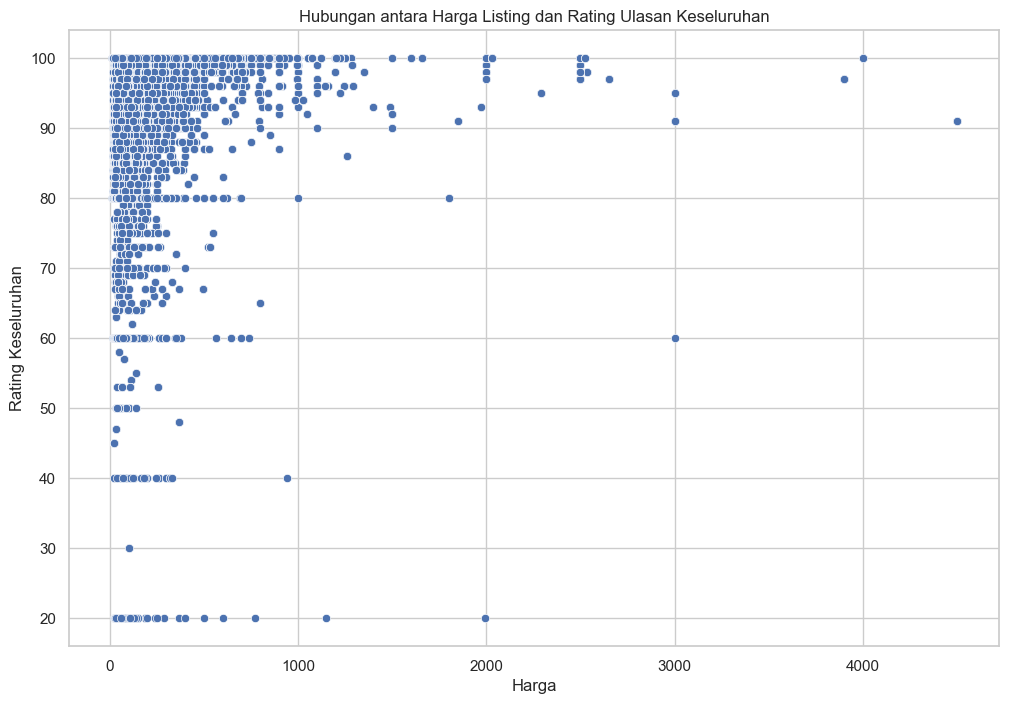

In [34]:
#7. Apakah ada hubungan antara harga listing dan rating ulasan keseluruhan?
# Membuat scatter plot untuk melihat hubungan antara harga dan rating keseluruhan
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='review_scores_rating')
plt.title('Hubungan antara Harga Listing dan Rating Ulasan Keseluruhan')
plt.xlabel('Harga')
plt.ylabel('Rating Keseluruhan')
plt.show()

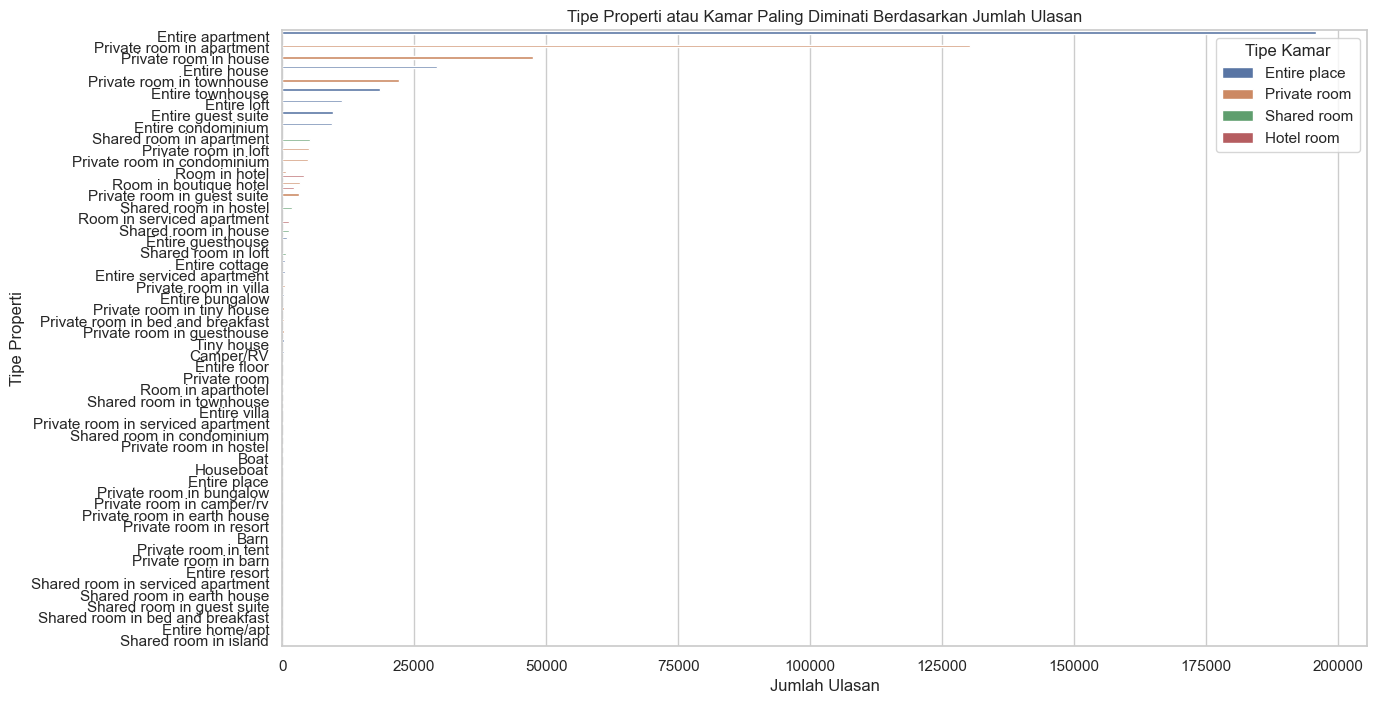

In [35]:
#8. Tipe properti atau kamar apa yang paling diminati berdasarkan jumlah ulasan?
# Menghitung jumlah ulasan untuk setiap kombinasi tipe properti dan tipe kamar
popularity_data = df.groupby(['property_type', 'room_type']).size().reset_index(name='review_count')

# Mengurutkan data berdasarkan jumlah ulasan terbanyak
popularity_data = popularity_data.sort_values(by='review_count', ascending=False)

# Membuat bar plot untuk menunjukkan tipe properti atau kamar yang paling diminati
plt.figure(figsize=(14, 8))
sns.barplot(data=popularity_data, x='review_count', y='property_type', hue='room_type')
plt.title('Tipe Properti atau Kamar Paling Diminati Berdasarkan Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Tipe Properti')
plt.legend(title='Tipe Kamar')
plt.show()

## Predictive Model

#### harga optimal

In [36]:
#9. Apa yang akan menjadi harga optimal untuk listing baru berdasarkan fitur-fitur seperti tipe properti, tipe kamar, lokasi, dan fasilitas?
# Select relevant columns for the model
df_model = df[['price', 'accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']].dropna()

# Define the features (X) and target (y)
X = df_model[['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']]
y = df_model['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict optimal prices for the test set
df_test = X_test.copy()
df_test['predicted_price'] = model.predict(X_test)

df_test

,accommodates,bedrooms,amenities_count,minimum_nights,maximum_nights,predicted_price
459671,2,1.0,23,1,28,70.217988
126051,5,2.0,50,7,180,186.706961
58520,7,3.0,27,12,130,250.257813
349571,4,1.0,30,30,1125,133.714749
483856,5,2.0,25,3,30,171.273088
...,...,...,...,...,...,...
146292,2,1.0,35,1,31,76.852881
3550,2,1.0,37,2,60,78.307787
94267,2,2.0,28,30,120,106.102037
188559,2,1.0,13,30,1125,76.783798


In [37]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

rmse

107.72085389150007

In [38]:
selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights',
                     'property_type', 'room_type']
df_model = df[selected_features + ['price']].dropna()

X = df_model[selected_features]
y = df_model['price']

# Preprocessor for categorical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type'])
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
predictions_rf = pipeline.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))

print("RMSE:", rmse_rf)

KeyboardInterrupt: 

In [ ]:
dfx = df.copy()

# Create amenities_count in dfx
dfx['amenities_count'] = dfx['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)

# Select more comprehensive features in dfx
dfx['location'] = dfx['city'] if 'city' in dfx.columns else dfx['district']  # Use city or district
selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 
                     'maximum_nights', 'property_type', 'room_type', 'location']
dfx_model = dfx[selected_features + ['price']].dropna()

# Define features (X) and target (y) in dfx
X = dfx_model[selected_features]
y = dfx_model['price']

# Preprocessing: scaling for numeric and one-hot encoding for categorical
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type', 'location'])
])

# Define the XGBoost model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
predictions_xgb = pipeline.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))

rmse_xgb

In [ ]:
dfy = df.copy()  # Salinan df sebagai dfy untuk menyimpan hasil prediksi

# Buat kolom binary untuk fasilitas utama seperti wifi dan AC
dfy['has_wifi'] = dfy['amenities'].apply(lambda x: 1 if 'wifi' in str(x).lower() else 0)
dfy['has_ac'] = dfy['amenities'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else 0)

# Buat kolom amenities_count untuk menghitung jumlah fasilitas
dfy['amenities_count'] = dfy['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)

# Pilih fitur utama
dfy['location'] = dfy['city'] if 'city' in dfy.columns else dfy['district']  # Gunakan city atau district jika ada
selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 
                     'maximum_nights', 'property_type', 'room_type', 'location', 'has_wifi', 'has_ac']
dfy_model = dfy[selected_features + ['price']].dropna()

# Definisikan fitur (X) dan target (y)
X = dfy_model[selected_features]
y = dfy_model['price']

# Preprocessing: scaling untuk numerik dan one-hot encoding untuk kategorikal
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type', 'location'])
])

# Definisikan model LightGBM dalam pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42))
])

# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
pipeline.fit(X_train, y_train)

# Prediksi harga optimal dan hitung RMSE
predictions_lgbm = pipeline.predict(X_test)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, predictions_lgbm))
print("RMSE dengan LightGBM:", rmse_lgbm)

# Tambahkan kolom predicted_price ke dfy
dfy['predicted_price'] = pipeline.predict(X)

# Tampilkan dfy untuk memastikan hasil
print(dfy[['property_type', 'room_type', 'location', 'amenities_count', 'has_wifi', 'has_ac', 'predicted_price']].head())

In [ ]:
# Assuming dfy is your main DataFrame with the necessary preprocessing
dfy = df.copy()

# Select relevant features and preprocess as before
selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights', 
                     'property_type', 'room_type', 'location', 'has_wifi', 'has_ac']
X = dfy[selected_features]
y = dfy['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model from Grid Search
best_rf = grid_search_rf.best_estimator_

# Check RMSE for the best Random Forest model
rf_predictions = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"RMSE for Tuned Random Forest: {rmse_rf}")

# Stacking Regressor with best RF, XGB, and LightGBM
estimators = [
    ('rf', best_rf),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42))
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Train the stacking model
stacking_regressor.fit(X_train, y_train)

# Predict with stacking model and calculate RMSE
stacking_predictions = stacking_regressor.predict(X_test)
rmse_stacking = np.sqrt(mean_squared_error(y_test, stacking_predictions))
print(f"RMSE for Stacking Regressor: {rmse_stacking}")


In [ ]:
dfy = df.copy()

# Pastikan kolom binary untuk fasilitas utama seperti wifi dan AC ada
dfy['has_wifi'] = dfy['amenities'].apply(lambda x: 1 if 'wifi' in str(x).lower() else 0)
dfy['has_ac'] = dfy['amenities'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else 0)

# Pastikan kolom amenities_count ada untuk menghitung jumlah fasilitas
dfy['amenities_count'] = dfy['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)

# Tambahkan kolom lokasi berdasarkan city atau district jika ada
if 'city' in dfy.columns:
    dfy['location'] = dfy['city']
elif 'district' in dfy.columns:
    dfy['location'] = dfy['district']
else:
    raise KeyError("Kolom 'city' atau 'district' tidak ditemukan di data asli.")

# Pilih fitur utama
selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 
                     'maximum_nights', 'property_type', 'room_type', 'location', 'has_wifi', 'has_ac']
dfy_model = dfy[selected_features + ['price']].dropna()

# Definisikan fitur (X) dan target (y)
X = dfy_model[selected_features]
y = dfy_model['price']

# Preprocessing: scaling untuk numerik dan one-hot encoding untuk kategorikal
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['property_type', 'room_type', 'location'])
])

# Integrasikan preprocessor ke dalam pipeline untuk memastikan semua fitur di-encode
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search for Random Forest (gunakan pipeline_rf untuk preprocessing)
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model from Grid Search
best_rf = grid_search_rf.best_estimator_

# Stacking Regressor dengan pipeline
estimators = [
    ('rf', best_rf),
    ('xgb', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42))])),
    ('lgbm', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42))]))
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Train the stacking model
stacking_regressor.fit(X_train, y_train)

# Predict on test data and calculate RMSE
stacking_predictions = stacking_regressor.predict(X_test)
rmse_stacking = np.sqrt(mean_squared_error(y_test, stacking_predictions))
print(f"RMSE for Stacking Regressor: {rmse_stacking}")


In [ ]:
# Load data asli
data = pd.read_csv('dfl.csv')

# Preprocessing function to create new features and prepare data
def preprocess_data(data):
    data_copy = data.copy()
    data_copy['has_wifi'] = data_copy['amenities'].apply(lambda x: 1 if 'wifi' in str(x).lower() else 0)
    data_copy['has_ac'] = data_copy['amenities'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else 0)
    data_copy['amenities_count'] = data_copy['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)
    data_copy['price_per_accommodate'] = data_copy['price'] / data_copy['accommodates']
    if 'city' in data_copy.columns:
        data_copy['location'] = data_copy['city']
    elif 'district' in data_copy.columns:
        data_copy['location'] = data_copy['district']
    selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 
                         'maximum_nights', 'property_type', 'room_type', 'location', 'has_wifi', 'has_ac',
                         'price_per_accommodate']
    data_copy = data_copy[selected_features + ['price']].dropna()
    # Log-transform price for normalization
    data_copy['price'] = np.log1p(data_copy['price'])
    return data_copy

# Function to setup and train model, then evaluate RMSE
def train_and_evaluate(model, data):
    X = data.drop('price', axis=1)
    y = data['price']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing: scaling for numerical and one-hot encoding for categorical
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights', 'price_per_accommodate']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['property_type', 'room_type', 'location'])
    ])
    
    # Pipeline with model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    predictions = pipeline.predict(X_test)
    # Transform back predictions for RMSE in original scale
    predictions = np.expm1(predictions)
    y_test = np.expm1(y_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"RMSE for {model.__class__.__name__}: {rmse}")
    return rmse

# Data preparation for each model
dfm = preprocess_data(data)
dfn = preprocess_data(data)
dfo = preprocess_data(data)
dfp = preprocess_data(data)
dfq = preprocess_data(data)

# 1. CatBoost Regressor
model_catboost = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=10, random_state=42, verbose=0)
rmse_catboost = train_and_evaluate(model_catboost, dfm)

# 2. Gradient Boosting Regressor
model_gradient_boosting = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
rmse_gradient_boosting = train_and_evaluate(model_gradient_boosting, dfn)

# 3. ElasticNet
model_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
rmse_elasticnet = train_and_evaluate(model_elasticnet, dfo)

# 4. Extra Trees Regressor
model_extra_trees = ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42)
rmse_extra_trees = train_and_evaluate(model_extra_trees, dfp)

# 5. XGBoost Regressor
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
rmse_xgb = train_and_evaluate(model_xgb, dfq)

# Summarize RMSE results for each model
rmse_results = {
    'CatBoost Regressor': rmse_catboost,
    'Gradient Boosting Regressor': rmse_gradient_boosting,
    'ElasticNet': rmse_elasticnet,
    'Extra Trees Regressor': rmse_extra_trees,
    'XGBoost Regressor': rmse_xgb
}

print("\nSummary of RMSE Results:")
for model_name, rmse in rmse_results.items():
    print(f"{model_name}: {rmse}")

In [39]:
# Load data asli
data = pd.read_csv('dfl.csv')

# Preprocessing function to create new features and prepare data
def preprocess_data(data):
    data_copy = data.copy()
    data_copy['has_wifi'] = data_copy['amenities'].apply(lambda x: 1 if 'wifi' in str(x).lower() else 0)
    data_copy['has_ac'] = data_copy['amenities'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else 0)
    data_copy['amenities_count'] = data_copy['amenities'].apply(lambda x: x.count(',') + 1 if pd.notna(x) else 0)
    data_copy['price_per_accommodate'] = data_copy['price'] / data_copy['accommodates']
    
    # Ganti 'location' menjadi 'district'
    if 'district' in data_copy.columns:
        data_copy['location'] = data_copy['district']
    
    selected_features = ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 
                         'maximum_nights', 'property_type', 'room_type', 'location', 'has_wifi', 'has_ac',
                         'price_per_accommodate']
    data_copy = data_copy[selected_features + ['price']].dropna()
    data_copy['price'] = np.log1p(data_copy['price'])
    return data_copy

# Hyperparameter tuning for GradientBoostingRegressor
def tune_gradient_boosting(data):
    X = data.drop('price', axis=1)
    y = data['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['accommodates', 'bedrooms', 'amenities_count', 'minimum_nights', 'maximum_nights', 'price_per_accommodate']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['property_type', 'room_type', 'location'])
    ])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])
    
    param_dist = {
        'model__n_estimators': randint(100, 500),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 10),
        'model__min_samples_leaf': randint(1, 4),
        'model__subsample': uniform(0.6, 0.4)  # Trying values between 0.6 and 1.0
    }
    
    random_search = RandomizedSearchCV(
        pipeline, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', 
        cv=3, random_state=42, n_jobs=-1
    )
    
    print("Starting RandomizedSearchCV...")
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV complete.")
    
    best_model = random_search.best_estimator_
    
    print("Starting prediction...")
    predictions = best_model.predict(X_test)
    print("Prediction complete.")
    
    # Transform back predictions for RMSE in original scale
    predictions = np.expm1(predictions)
    y_test = np.expm1(y_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Best RMSE for GradientBoostingRegressor after tuning: {rmse}")
    print("Best Parameters:", random_search.best_params_)
    
    return best_model

# Preprocess data
processed_data = preprocess_data(data)

# Perform hyperparameter tuning and evaluate RMSE
best_gboost_model = tune_gradient_boosting(processed_data)

Starting RandomizedSearchCV...
RandomizedSearchCV complete.
Starting prediction...
Prediction complete.
Best RMSE for GradientBoostingRegressor after tuning: 14.30163470846513
Best Parameters: {'model__learning_rate': 0.17280882494747454, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 8, 'model__n_estimators': 400, 'model__subsample': 0.6298202574719083}


pake gradientboost tadi aja

In [ ]:
# Menggunakan model terbaik untuk melakukan prediksi pada seluruh data
data_all = processed_data.drop('price', axis=1)  # Semua fitur tanpa target (price)
price_actual = np.expm1(processed_data['price'])  # Transformasikan balik harga asli untuk membandingkan

# Melakukan prediksi dengan model terbaik pada seluruh data
price_predicted = np.expm1(best_gboost_model.predict(data_all))  # Prediksi pada skala asli

# Membuat DataFrame untuk hasil prediksi
results_df = processed_data.copy()
results_df['price_actual'] = price_actual  # Harga asli
results_df['price_predicted'] = price_predicted  # Harga hasil prediksi

# Menentukan harga optimal berdasarkan kombinasi fitur
optimal_price_df = results_df.groupby(['location', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'has_wifi', 'has_ac'])['price_predicted'].agg(
    optimal_price_median='median',             # Harga optimal median
    optimal_price_75=lambda x: x.quantile(0.75)  # Harga optimal pada kuantil ke-75
).reset_index()

# Menyimpan hasil ke dalam file CSV untuk digunakan di dashboard
# optimal_price_df.to_csv('optimal_price_combinations_from_model.csv', index=False)

print("File CSV 'optimal_price_combinations_from_model.csv' berhasil dibuat dengan harga optimal berdasarkan prediksi model.")

In [43]:
data = pd.read_csv('optimal_price_combinations_from_model.csv')
data.head()

,location,property_type,room_type,accommodates,bedrooms,has_wifi,has_ac,optimal_price_median,optimal_price_75
0,Bronx,Entire apartment,Entire place,1,1.0,1,0,61.683436,61.683436
1,Bronx,Entire apartment,Entire place,1,1.0,1,1,100.255316,100.255316
2,Bronx,Entire apartment,Entire place,2,1.0,0,0,84.906704,84.906704
3,Bronx,Entire apartment,Entire place,2,1.0,1,0,94.857858,94.857858
4,Bronx,Entire apartment,Entire place,2,1.0,1,1,88.647933,101.687985


In [44]:
data['has_wifi'] = data['has_wifi'].apply(lambda x: 'Yes' if x == 1 else 'No')
data['has_ac'] = data['has_ac'].apply(lambda x: 'Yes' if x == 1 else 'No')

data.head()

,location,property_type,room_type,accommodates,bedrooms,has_wifi,has_ac,optimal_price_median,optimal_price_75
0,Bronx,Entire apartment,Entire place,1,1.0,Yes,No,61.683436,61.683436
1,Bronx,Entire apartment,Entire place,1,1.0,Yes,Yes,100.255316,100.255316
2,Bronx,Entire apartment,Entire place,2,1.0,No,No,84.906704,84.906704
3,Bronx,Entire apartment,Entire place,2,1.0,Yes,No,94.857858,94.857858
4,Bronx,Entire apartment,Entire place,2,1.0,Yes,Yes,88.647933,101.687985


In [45]:
data.to_csv('optimal_price.csv', index=False)

setelah melakukan banyak percobaan dan pembuatan model yang cocok, akhirnya kami mantap menggunakan gradient boost regression karena memiliki rmse paling kecil. untuk list model dan satuan rmse-nya sudah kami cantumkan pada tabel pada folder yang sama dengan kode ini